A sample data for the kind of data you need to download for your chosen district can be found here: https://censusindia.gov.in/nada/index.php/catalog/41020 This link will take you to the Primary Census Abstract, block wise for Haora district in West Bengal. The downloaded data will be as an excel file. The meaning of the columns in the excel file will also be available in the web link for the chosen district. For example, the link given above contains the meaning of the column names in the downloaded excel file for Haora district in West Bengal. You need to download such Primary Census Abstract for your randomly selected districts for your selected state. Once you have downloaded the data for your districts, you have to perform data visualisations of the following. \\
#Summary of broad characteristics:  
Distribution of the population by rural/urban \\
Distribution of population by gender \\
Distribution of the population by caste \\
Distribution of population of occupation \\
#Crosstabulation/Conditional distributions of the population 
Distribution of occupation type by gender by block \\
Distribution of literacy by rural/urban \\
Distribution of literacy by gender \\
For all those places, classified as urban, distribution of literacy by gender \\
 

The state I selected here is 'Kerala' and the district is Thrissur. 

[This is the dataset I have taken](https://docs.google.com/spreadsheets/d/1GL4VKIXKnCPHjBseFx-GZI4f6AOn5LZKsQvOLwjANls/edit#gid=1992251460) 

or  [ You can access the data here](https://docs.google.com/spreadsheets/d/1GL4VKIXKnCPHjBseFx-GZI4f6AOn5LZKsQvOLwjANls/edit?usp=sharing)


In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Thrissur = pd.read_excel('PCA_CDB-3207-F-Census.xlsx')


In [94]:
Thrissur.head()

,State,District,DT Name,CD Block,Town/Village,Ward,EB,Level,Name,TRU,...,MARG_AL_0_3_F,MARG_HH_0_3_P,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_P,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_P,NON_WORK_M,NON_WORK_F
0,32,594,Thrissur,56,0,0,0,CD BLOCK,Chowwannur,Total,...,48,33,9,24,807,377,430,103446,34965,68481
1,32,594,Thrissur,56,0,0,0,CD BLOCK,Chowwannur,Rural,...,11,8,4,4,196,91,105,20384,6788,13596
2,32,594,Thrissur,56,0,0,0,CD BLOCK,Chowwannur,Urban,...,37,25,5,20,611,286,325,83062,28177,54885
3,32,594,Thrissur,56,627714,0,0,VILLAGE,Perumpilavu,Rural,...,2,7,4,3,96,52,44,6795,2329,4466
4,32,594,Thrissur,56,627736,0,0,VILLAGE,Chowwannur (Part),Rural,...,3,0,0,0,15,11,4,4578,1451,3127


In [95]:
#lets see if there are any missing data

for col in Thrissur.columns:
  prcnt_missing=np.mean(Thrissur[col].isnull())
  print('{} - {}%'.format(col, prcnt_missing ))

#So we found everything as 0%. Therefore there is no missing data



State - 0.0%
District - 0.0%
DT Name - 0.0%
CD Block - 0.0%
Town/Village - 0.0%
Ward - 0.0%
EB - 0.0%
Level - 0.0%
Name - 0.0%
TRU - 0.0%
No_HH - 0.0%
TOT_P - 0.0%
TOT_M - 0.0%
TOT_F - 0.0%
P_06 - 0.0%
M_06 - 0.0%
F_06 - 0.0%
P_SC - 0.0%
M_SC - 0.0%
F_SC - 0.0%
P_ST - 0.0%
M_ST - 0.0%
F_ST - 0.0%
P_LIT - 0.0%
M_LIT - 0.0%
F_LIT - 0.0%
P_ILL - 0.0%
M_ILL - 0.0%
F_ILL - 0.0%
TOT_WORK_P - 0.0%
TOT_WORK_M - 0.0%
TOT_WORK_F - 0.0%
MAINWORK_P - 0.0%
MAINWORK_M - 0.0%
MAINWORK_F - 0.0%
MAIN_CL_P - 0.0%
MAIN_CL_M - 0.0%
MAIN_CL_F - 0.0%
MAIN_AL_P - 0.0%
MAIN_AL_M - 0.0%
MAIN_AL_F - 0.0%
MAIN_HH_P - 0.0%
MAIN_HH_M - 0.0%
MAIN_HH_F - 0.0%
MAIN_OT_P - 0.0%
MAIN_OT_M - 0.0%
MAIN_OT_F - 0.0%
MARGWORK_P - 0.0%
MARGWORK_M - 0.0%
MARGWORK_F - 0.0%
MARG_CL_P - 0.0%
MARG_CL_M - 0.0%
MARG_CL_F - 0.0%
MARG_AL_P - 0.0%
MARG_AL_M - 0.0%
MARG_AL_F - 0.0%
MARG_HH_P - 0.0%
MARG_HH_M - 0.0%
MARG_HH_F - 0.0%
MARG_OT_P - 0.0%
MARG_OT_M - 0.0%
MARG_OT_F - 0.0%
MARGWORK_3_6_P - 0.0%
MARGWORK_3_6_M - 0.0%
MARGWORK_3

#Distribution of the population by rural/urban

In [96]:
dfr=Thrissur[Thrissur['TRU']=='Rural']
dfu=Thrissur[Thrissur['TRU']=='Urban']

Rural_p=dfr['TOT_P'].sum()/2  #we divided the sum by 2 otherwise it will include the total rural population 
Urban_p=dfu['TOT_P'].sum()/2


In [97]:
#lets create a dataframe with the above output

data_R_U=[['Rural',Rural_p],['Urban',Urban_p]] 
df_R_U = pd.DataFrame(data_R_U, columns=['Area', 'Population(in millions)'])

df_R_U.head()

,Area,Population(in millions)
0,Rural,1024794.0
1,Urban,1554569.0


Text(0, 0.5, 'Population(in millions)')

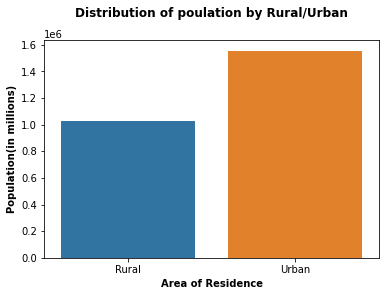

In [98]:
#Now lets plot this data as a bar graph

sns.barplot(x='Area', y='Population(in millions)',data=df_R_U)
plt.title('Distribution of poulation by Rural/Urban',fontweight='bold',y=1.08)
plt.xlabel('Area of Residence',fontweight='bold')
plt.ylabel('Population(in millions)',fontweight='bold')

#Distribution of population by gender


In [99]:
df_gender=Thrissur[Thrissur['TRU']=='Total']

M_p=df_gender['TOT_M'].sum()
F_p=df_gender['TOT_F'].sum()

#Now lets create a dataframe with the above data

data_gender=[['Male',M_p],['Female',F_p]] 
df_g = pd.DataFrame(data_gender, columns=['Gender', 'Population(in millions)'])

df_g.head()

,Gender,Population(in millions)
0,Male,1222461
1,Female,1356902


Text(0, 0.5, 'Population(in millions)')

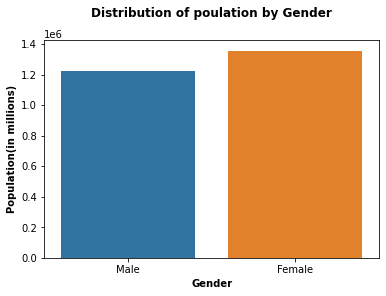

In [100]:
#lets plot the above data as bar graph
sns.barplot(x='Gender', y='Population(in millions)',data=df_g)
plt.title('Distribution of poulation by Gender',fontweight='bold',y=1.08)
plt.xlabel('Gender',fontweight='bold')
plt.ylabel('Population(in millions)',fontweight='bold')

#Distribution of the population by caste 


In [101]:
SC_p=df_gender['P_SC'].sum()
ST_p=df_gender['P_ST'].sum()
Total_P=df_gender['TOT_P'].sum()

Other_caste=Total_P-ST_p+SC_p


data_caste=[['SCs',SC_p],['STs',ST_p],['Other Caste',Other_caste]] 
df_caste = pd.DataFrame(data_caste, columns=['Caste', 'Population(in millions)'])


Text(0, 0.5, 'Population(in millions)')

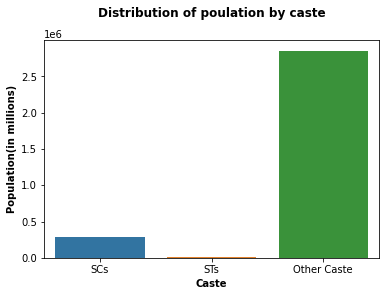

In [102]:
#lets see the above data as bar graph

sns.barplot(x='Caste', y='Population(in millions)',data=df_caste)
plt.title('Distribution of poulation by caste',fontweight='bold',y=1.08)
plt.xlabel('Caste',fontweight='bold')
plt.ylabel('Population(in millions)',fontweight='bold')

Text(0.5, 1.08, 'Distribution of Population by Caste')

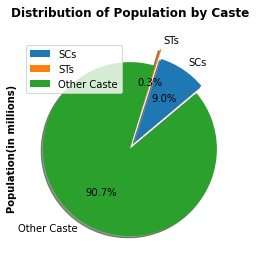

In [103]:
#lets see the same visualisation as pie chart

df_caste.plot(kind = 'pie', y = 'Population(in millions)',startangle=40, labels = ['SCs', 'STs','Other Caste'], autopct='%0.001f%%',shadow = True, explode = (0.1, 0.2,0))
plt.ylabel('Population(in millions)',fontweight='bold')
plt.title('Distribution of Population by Caste',fontweight='bold',y=1.08)


#Distribution of population of occupation

In [104]:
#we plot this data category wise as main, marginal and Non workers

df_oc=Thrissur[Thrissur['TRU']=='Total']

df_oc_main=df_oc['MAINWORK_P'].sum()
df_oc_marg=df_oc['MARGWORK_P'].sum()
df_oc_NW=df_oc['NON_WORK_P'].sum()

data_oc=[['Main Workers',df_oc_main],['Marginal Workers',df_oc_marg],['Non-Workers',df_oc_NW]] 
df_oc = pd.DataFrame(data_oc, columns=['Worker category', 'Worker Population(in millions)'])


Text(0.5, 0, 'Worker Category')

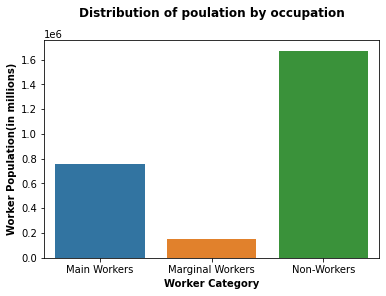

In [105]:
#lets see it as bar graph

sns.barplot(x='Worker category', y='Worker Population(in millions)',data=df_oc)
plt.title('Distribution of poulation by occupation',fontweight='bold',y=1.08)
plt.ylabel('Worker Population(in millions)',fontweight='bold')
plt.xlabel('Worker Category',fontweight='bold')

#Distribution of occupation type by gender by block

Text(0.5, 0, 'Block')

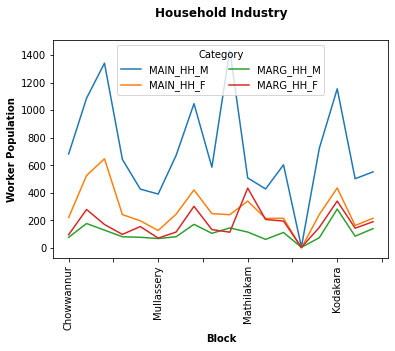

In [106]:
#Lets see this as a line graph

df_gender.plot(x='Name',y=['MAIN_HH_M','MAIN_HH_F','MARG_HH_M','MARG_HH_F']).legend(loc='best', ncol=2, title="Category")
plt.xticks(rotation='vertical')
plt.title('Household Industry',fontweight='bold',y=1.08)
plt.ylabel('Worker Population',fontweight='bold')
plt.xlabel('Block',fontweight='bold')

#This shows the graph of Household industry ... 
#For other categories we just need to change the given parameters in the 'y' and title

None
None
None
None


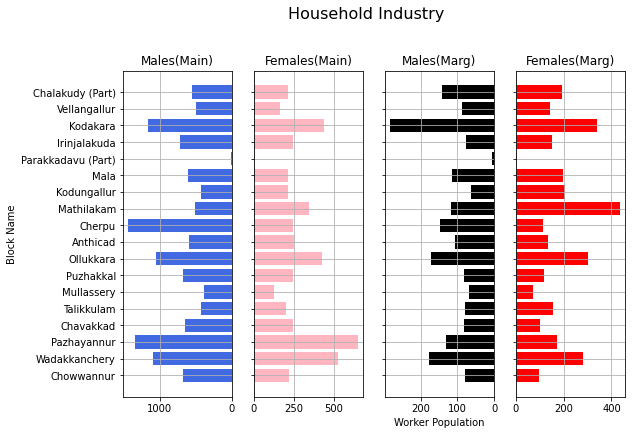

In [107]:
#We can visualise the same in different way as I did below

y = range(0, len(df_gender))

MAIN_CL_M=df_gender['MAIN_CL_M']
MAIN_CL_F=df_gender['MAIN_CL_F']
MAIN_AL_M=df_gender['MAIN_AL_M']
MAIN_AL_F=df_gender['MAIN_AL_F']
MAIN_HH_M=df_gender['MAIN_HH_M']
MAIN_HH_F=df_gender['MAIN_HH_F']
MAIN_OT_M=df_gender['MAIN_OT_M']
MAIN_OT_F=df_gender['MAIN_OT_F']
MARG_CL_M=df_gender['MARG_CL_M']
MARG_CL_F=df_gender['MARG_CL_F']
MARG_AL_M=df_gender['MARG_AL_M']
MARG_AL_F=df_gender['MARG_AL_F']
MARG_HH_M=df_gender['MARG_HH_M']
MARG_HH_F=df_gender['MARG_HH_F']
MARG_OT_M=df_gender['MARG_OT_M']
MARG_OT_F=df_gender['MARG_OT_F']


#define plot parameters
fig, axes = plt.subplots(ncols=4, sharey=True, figsize=(9, 6))

#specify background color and plot title
#fig.patch.set_facecolor('xkcd:light grey')
plt.figtext(0.5,1,"Household Industry", fontsize=16, ha='center')
    
#define male and female bars
axes[0].barh(y, MAIN_HH_M, align='center', color='royalblue')
axes[0].set(title='Males(Main)')
axes[1].barh(y, MAIN_HH_F, align='center', color='lightpink')
axes[1].set(title='Females(Main)')
axes[2].barh(y, MARG_HH_M, align='center', color='black')
axes[2].set(title='Males(Marg)',xlabel='Worker Population')
axes[3].barh(y, MARG_HH_F, align='center', color='red')
axes[3].set(title='Females(Marg)')
#adjust grid parameters and specify labels for y-axis
#axes[1].grid()
axes[0].set(yticks=y, yticklabels=df_gender['Name'],ylabel='Block Name')
axes[0].invert_xaxis()
#axes[0].grid()
#axes[3].grid()
#axes[2].set(yticks=y, yticklabels=dfg['Name'])
axes[2].invert_xaxis()
#axes[2].grid()
for i in range(0,4):
  print(axes[i].grid())

plt.show()

#This shows the graph of Household industry ... 
#For other categories we just need to change the given parameters and title

#Distribution of literacy by rural/urban 


In [108]:
Rural_lp=dfr['P_LIT'].sum()/2
Urban_lp=dfu['P_LIT'].sum()/2
Rural_ilp=dfr['P_ILL'].sum()/2
Urban_ilp=dfu['P_ILL'].sum()/2

data_lru=[['Rural','Literate',Rural_lp],['Rural','Illeterate',Rural_ilp],['Urban','Literate',Urban_lp],['Urban','Illeterate',Urban_ilp]]
df_lru = pd.DataFrame(data_lru, columns=['Area', 'type','Population(in millions)'])

df_lru.head()

,Area,type,Population(in millions)
0,Rural,Literate,865471.0
1,Rural,Illeterate,159323.0
2,Urban,Literate,1335211.0
3,Urban,Illeterate,219358.0


Text(0.5, 20.799999999999983, 'Area')

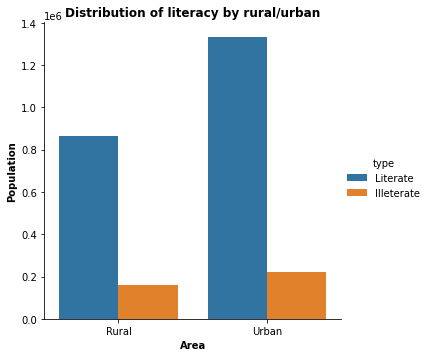

In [109]:
sns.catplot(x='Area',y='Population(in millions)',hue="type",kind='bar',data=df_lru)

plt.title('Distribution of literacy by rural/urban',fontweight='bold',y=1.08)
plt.ylabel('Population',fontweight='bold')
plt.xlabel('Area',fontweight='bold')

#Distribution of literacy by gender 
 

In [110]:
Male_lp=df_gender['M_LIT'].sum()
Female_lp=df_gender['F_LIT'].sum()
Male_ilp=df_gender['M_ILL'].sum()
Female_ilp=df_gender['F_ILL'].sum()

data_lmf=[['Male','Literate',Male_lp],['Male','Illeterate',Male_ilp],['Female','Literate',Female_lp],['Female','Illeterate',Female_ilp]]
df_lmf = pd.DataFrame(data_lmf, columns=['Gender', 'type','Literacy'])

df_lmf.head()


,Gender,type,Literacy
0,Male,Literate,1053646
1,Male,Illeterate,168815
2,Female,Literate,1147036
3,Female,Illeterate,209866


Text(0.5, 20.799999999999983, 'Gender')

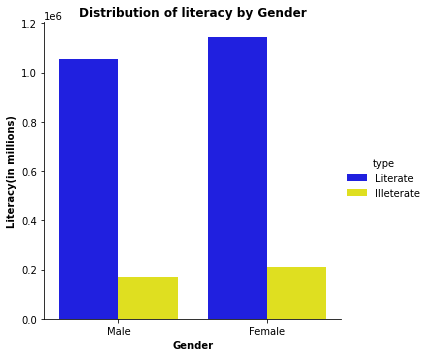

In [111]:
palette = {c: "yellow" if c != "Literate" else "blue" for c in df_lmf["type"].unique()}

sns.catplot(x='Gender',y='Literacy',hue="type",kind='bar',palette=palette, data=df_lmf)

plt.title('Distribution of literacy by Gender',fontweight='bold',y=1.08)
plt.ylabel('Literacy(in millions)',fontweight='bold')
plt.xlabel('Gender',fontweight='bold')

#For all those places, classified as urban, distribution of literacy by gender 


In [112]:
Male_ulp=dfu['M_LIT'].sum()/2
Female_ulp=dfu['F_LIT'].sum()/2
Male_uilp=dfu['M_ILL'].sum()/2
Female_uilp=dfu['F_ILL'].sum()/2

data_ulmf=[['Male','Literate',Male_ulp],['Male','Illeterate',Male_uilp],['Female','Literate',Female_ulp],['Female','Illeterate',Female_uilp]]
df_ulmf = pd.DataFrame(data_ulmf, columns=['Gender', 'type','Literacy'])

df_ulmf.head()

,Gender,type,Literacy
0,Male,Literate,635026.0
1,Male,Illeterate,99132.0
2,Female,Literate,700185.0
3,Female,Illeterate,120226.0


Text(0.5, 20.80000000000002, 'Gender')

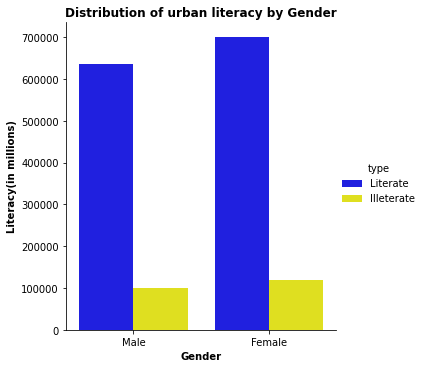

In [113]:
palette = {c: "yellow" if c != "Literate" else "blue" for c in df_ulmf["type"].unique()}

sns.catplot(x='Gender',y='Literacy',hue="type",kind='bar',palette=palette, data=df_ulmf)

plt.title('Distribution of urban literacy by Gender',fontweight='bold',y=1.08)
plt.ylabel('Literacy(in millions)',fontweight='bold')
plt.xlabel('Gender',fontweight='bold')

For your selected state, search for the following dataset in the census website: Main workers, marginal workers, non-workers and those marginal workers, non-workers seeking/available for work classified by age, sex and religious community. From this dataset, perform the following visualisations \\
Distribution of main workers, marginal workers and non-workers by religion \\
Distribution of main workers, marginal workers and non-workers by age-group \\
Distribution of main workers, marginal workers and non-workers by rural/urban \\
Distribution of main workers, marginal workers and non-workers by religion by gender \\
Finally, read up on the definition of Labour Force Participation Rate (LFPR) and calculate the LFPR for the age-group 15-50 for your allotted state by gender.  
Finally, from the census website, for your selected state, demonstrate the distribution of occupational categories by gender.

[The dataset I have taken](https://docs.google.com/spreadsheets/d/1uoKmC3ZL_94PMEQISlvBMDrI0dK7K3BuIRI7Nnt0S4M/edit#gid=1411985912/)

or [You can access the same here](https://docs.google.com/spreadsheets/d/1uoKmC3ZL_94PMEQISlvBMDrI0dK7K3BuIRI7Nnt0S4M/edit?usp=sharing)

In [114]:
kerala = pd.read_excel('DDW-0000B-02 (2).xlsx')
df_k=kerala.groupby('Area Name')
dfk=df_k.get_group('State - KERALA')

#Distribution of main workers, marginal workers and non-workers by religion

In [115]:
dfmmr=dfk.groupby("TRU")
dfmmr_T=dfmmr.get_group('Total')
dfmmr_A=dfmmr_T.groupby('Age Group')
dfmmr_AT=dfmmr_A.get_group('Total')

dfmmr_AT=dfmmr_AT.drop(dfmmr_AT.index[dfmmr_AT['Religion']=='All religious communities'])

dfmmr_AT.head()

,Table Name,State Code,District Code,TRU,Area Name,Religion,Age Group,P_Persons,P_Males,P_Females,...,Marg_T_Females,Marg_S_Persons,Marg_S_Males,Marg_S_Females,NW_T_Persons,NW_T_Males,NW_T_Females,NW_S_Persons,NW_S_Males,NW_S_Females
12304,B0402,32,0.0,Total,State - KERALA,Hindu,Total,18282492.0,8803455.0,9479037.0,...,698141.0,711806.0,384355.0,327451.0,11140748.0,3845762.0,7294986.0,2212726.0,612085.0,1600641.0
12320,B0402,32,0.0,Total,State - KERALA,Muslim,Total,8873472.0,4176255.0,4697217.0,...,121127.0,210551.0,149519.0,61032.0,6696805.0,2317245.0,4379560.0,1001231.0,325556.0,675675.0
12336,B0402,32,0.0,Total,State - KERALA,Christian,Total,6141269.0,2993781.0,3147488.0,...,194646.0,189645.0,100586.0,89059.0,3873678.0,1381511.0,2492167.0,693551.0,214423.0,479128.0
12352,B0402,32,0.0,Total,State - KERALA,Sikh,Total,3814.0,2173.0,1641.0,...,85.0,109.0,69.0,40.0,2303.0,946.0,1357.0,409.0,146.0,263.0
12368,B0402,32,0.0,Total,State - KERALA,Buddhist,Total,4752.0,2442.0,2310.0,...,118.0,135.0,73.0,62.0,3408.0,1443.0,1965.0,500.0,178.0,322.0


Text(0, 0.5, 'Worker Population(in ten millions)')

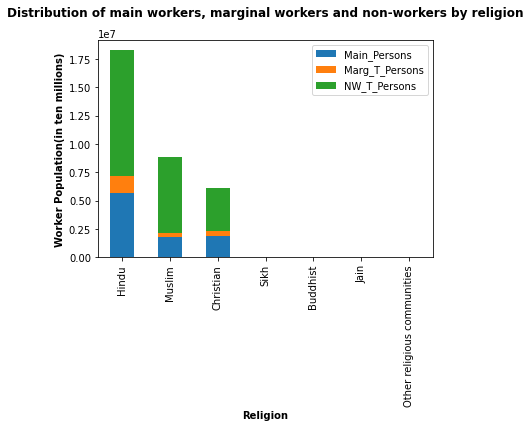

In [116]:
#Lets see this as stacked bar graph

dfmmr_AT.plot(kind='bar',x='Religion',y=['Main_Persons','Marg_T_Persons','NW_T_Persons'], stacked=True)

plt.title('Distribution of main workers, marginal workers and non-workers by religion',fontweight='bold',y=1.08)
plt.xlabel('Religion',fontweight='bold')
plt.ylabel('Worker Population(in ten millions)',fontweight='bold')

#Distribution of main workers, marginal workers and non-workers by age-group


In [117]:
dfmma_R=dfmmr_T.groupby('Religion')
dfmma_A=dfmma_R.get_group('All religious communities')
dfmma_A=dfmma_A.drop(dfmma_A.index[dfmma_A['Age Group']=='Total'])

dfmma_A=dfmma_A.drop(dfmma_A.index[dfmma_A['Age Group']=='15-59'])
dfmma_A=dfmma_A.drop(dfmma_A.index[dfmma_A['Age Group']=='60+'])

dfmma_A.head()

,Table Name,State Code,District Code,TRU,Area Name,Religion,Age Group,P_Persons,P_Males,P_Females,...,Marg_T_Females,Marg_S_Persons,Marg_S_Males,Marg_S_Females,NW_T_Persons,NW_T_Males,NW_T_Females,NW_S_Persons,NW_S_Males,NW_S_Females
12289,B0402,32,0.0,Total,State - KERALA,All religious communities,5-9,2555112.0,1303190.0,1251922.0,...,4081.0,3780.0,1946.0,1834.0,2539348.0,1294840.0,1244508.0,38616.0,19729.0,18887.0
12290,B0402,32,0.0,Total,State - KERALA,All religious communities,10-14,2822770.0,1438917.0,1383853.0,...,7301.0,8386.0,4454.0,3932.0,2793098.0,1421375.0,1371723.0,90263.0,46479.0,43784.0
12291,B0402,32,0.0,Total,State - KERALA,All religious communities,15-19,2610552.0,1328299.0,1282253.0,...,25452.0,53953.0,34750.0,19203.0,2409371.0,1179021.0,1230350.0,744826.0,373120.0,371706.0
12292,B0402,32,0.0,Total,State - KERALA,All religious communities,20-24,2665809.0,1298826.0,1366983.0,...,73495.0,171921.0,114536.0,57385.0,1782045.0,617733.0,1164312.0,1033655.0,407614.0,626041.0
12293,B0402,32,0.0,Total,State - KERALA,All religious communities,25-29,2604092.0,1203978.0,1400114.0,...,96773.0,183500.0,114510.0,68990.0,1267231.0,178228.0,1089003.0,669761.0,130128.0,539633.0


Text(0, 0.5, 'Worker Population(in milllions)')

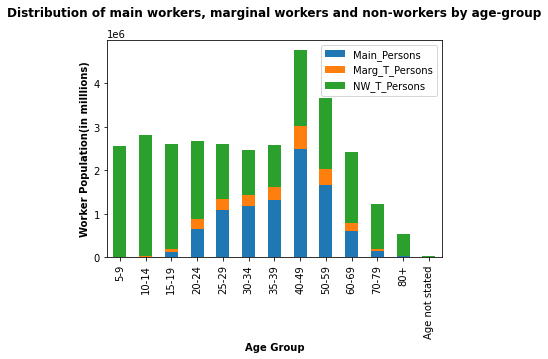

In [118]:
#lets see this also as stacked bar graph

dfmma_A.plot(x='Age Group',y=['Main_Persons','Marg_T_Persons','NW_T_Persons'],kind='bar',stacked=True)

plt.title('Distribution of main workers, marginal workers and non-workers by age-group',fontweight='bold',y=1.08)
plt.xlabel('Age Group',fontweight='bold')
plt.ylabel('Worker Population(in milllions)',fontweight='bold')

#Distribution of main workers, marginal workers and non-workers by rural/urban


In [119]:
dfk_N=dfk.drop(dfk.index[dfk['TRU']=='Total'])
dfk_N=dfk_N.groupby('Religion')
dfru=dfk_N.get_group('All religious communities')

dfru=dfru.groupby('Age Group')
dfru_T=dfru.get_group('Total')

dfru_T['Marg_TS_Persons']=dfru_T['Marg_T_Persons']+dfru_T['Marg_S_Persons']
dfru_T['NW_TS_Persons']=dfru_T['NW_T_Persons']+dfru_T['NW_S_Persons']

dfru_T.head()

<ipython-input-119-008199e1b588>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfru_T['Marg_TS_Persons']=dfru_T['Marg_T_Persons']+dfru_T['Marg_S_Persons']
<ipython-input-119-008199e1b588>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfru_T['NW_TS_Persons']=dfru_T['NW_T_Persons']+dfru_T['NW_S_Persons']


,Table Name,State Code,District Code,TRU,Area Name,Religion,Age Group,P_Persons,P_Males,P_Females,...,Marg_S_Males,Marg_S_Females,NW_T_Persons,NW_T_Males,NW_T_Females,NW_S_Persons,NW_S_Males,NW_S_Females,Marg_TS_Persons,NW_TS_Persons
12416,B0502,32,0.0,Rural,State - KERALA,All religious communities,Total,17471135.0,8408054.0,9063081.0,...,383270.0,297301.0,11129178.0,3900553.0,7228625.0,2056498.0,609165.0,1447333.0,2092337.0,13185676.0
12544,B0602,32,0.0,Urban,State - KERALA,All religious communities,Total,15934926.0,7619358.0,8315568.0,...,253878.0,182222.0,10657820.0,3675290.0,6982530.0,1864714.0,547950.0,1316764.0,1313650.0,12522534.0


Text(0, 0.5, 'Worker Population(in ten milllions)')

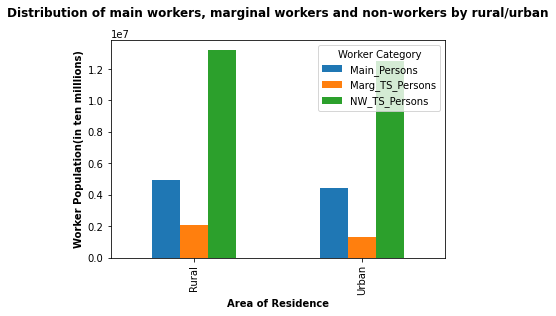

In [120]:
dfru_T.plot(x='TRU',y=['Main_Persons','Marg_TS_Persons','NW_TS_Persons'],kind='bar').legend(loc='upper right',ncol=1, title="Worker Category")

plt.title('Distribution of main workers, marginal workers and non-workers by rural/urban',fontweight='bold',y=1.08)
plt.xlabel('Area of Residence',fontweight='bold')
plt.ylabel('Worker Population(in ten milllions)',fontweight='bold')

#Distribution of main workers, marginal workers and non-workers by religion by gender


In [121]:
y = range(0, len(dfmmr_AT))

Main_T_Males=dfmmr_AT['Main_Males']
Main_T_Females=dfmmr_AT['Main_Females']
Marg_T_Males=dfmmr_AT['Marg_T_Males']
Marg_T_Females=dfmmr_AT['Marg_T_Females']
NW_T_Males=dfmmr_AT['NW_T_Males']
NW_T_Females=dfmmr_AT['NW_T_Females']



None
None
None
None
None
None


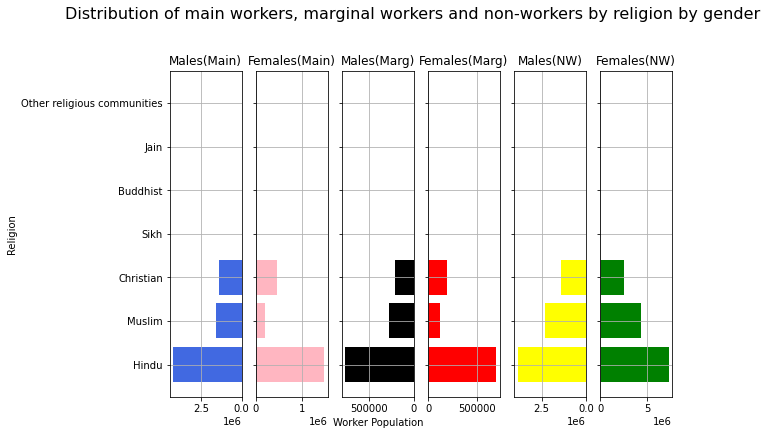

In [122]:
#define plot parameters
fig, axes = plt.subplots(ncols=6, sharey=True, figsize=(9, 6))

plt.figtext(0.5,1,"Distribution of main workers, marginal workers and non-workers by religion by gender", fontsize=16, ha='center')
    
#define male and female bars
axes[0].barh(y, Main_T_Males, align='center', color='royalblue')
axes[0].set(title='Males(Main)')
axes[1].barh(y, Main_T_Females, align='center', color='lightpink')
axes[1].set(title='Females(Main)')
axes[2].barh(y, Marg_T_Males, align='center', color='black')
axes[2].set(title='Males(Marg)',xlabel='Worker Population')
axes[3].barh(y, Marg_T_Females, align='center', color='red')
axes[3].set(title='Females(Marg)')
axes[4].barh(y, NW_T_Males, align='center', color='yellow')
axes[4].set(title='Males(NW)')
axes[5].barh(y, NW_T_Females, align='center', color='green')
axes[5].set(title='Females(NW)')
#adjust grid parameters and specify labels for y-axis
#axes[1].grid()
axes[0].set(yticks=y, yticklabels=dfmmr_AT['Religion'],ylabel='Religion')
axes[0].invert_xaxis()
#axes[0].grid()
#axes[3].grid()
#axes[2].set(yticks=y, yticklabels=dfg['Name'])
axes[2].invert_xaxis()
axes[4].invert_xaxis()
#axes[2].grid()
for i in range(0,6):
  print(axes[i].grid())
#display plot
plt.show()

#LFPR of Kerala by Gender


In [123]:
dflfpr=dfmmr_T.groupby('Religion')
dflfpr=dflfpr.get_group('All religious communities')

x=dflfpr.groupby('Age Group')

dfmmr_AT0=x.get_group('15-59')
dfmmr_AT1=x.get_group('20-24')
dfmmr_AT2=x.get_group('25-29')
dfmmr_AT3=x.get_group('30-34')
dfmmr_AT4=x.get_group('35-39')
dfmmr_AT5=x.get_group('40-49')

dfmmr_AT1['T_R_Males']=dfmmr_AT0['P_Males'].values+dfmmr_AT1['P_Males'].values+dfmmr_AT2['P_Males'].values+dfmmr_AT3['P_Males'].values+dfmmr_AT4['P_Males'].values+dfmmr_AT5['P_Males'].values
dfmmr_AT1['T_R_Females']=dfmmr_AT0['P_Females'].values+dfmmr_AT1['P_Females'].values+dfmmr_AT2['P_Females'].values+dfmmr_AT3['P_Females'].values+dfmmr_AT4['P_Females'].values+dfmmr_AT5['P_Females'].values

dfmmr_AT1['LFP_Males']=dfmmr_AT0['Main_Males'].values+dfmmr_AT0['Marg_T_Males'].values+dfmmr_AT0['Marg_S_Males'].values+dfmmr_AT0['NW_S_Males'].values+dfmmr_AT1['Main_Males'].values+dfmmr_AT1['Marg_T_Males'].values+dfmmr_AT1['Marg_S_Males'].values+dfmmr_AT1['NW_S_Males'].values+dfmmr_AT2['Main_Males'].values+dfmmr_AT2['Marg_T_Males'].values+dfmmr_AT2['Marg_S_Males'].values+dfmmr_AT2['NW_S_Males'].values+dfmmr_AT3['Main_Males'].values+dfmmr_AT3['Marg_T_Males'].values+dfmmr_AT3['Marg_S_Males'].values+dfmmr_AT3['NW_S_Males'].values+dfmmr_AT4['Main_Males'].values+dfmmr_AT4['Marg_T_Males'].values+dfmmr_AT4['Marg_S_Males'].values+dfmmr_AT4['NW_S_Males'].values+dfmmr_AT5['Main_Males'].values+dfmmr_AT5['Marg_T_Males'].values+dfmmr_AT5['Marg_S_Males'].values+dfmmr_AT5['NW_S_Males'].values
dfmmr_AT1['LFP_Females']=dfmmr_AT0['Main_Females'].values+dfmmr_AT0['Marg_T_Females'].values+dfmmr_AT0['Marg_S_Females'].values+dfmmr_AT0['NW_S_Females'].values+dfmmr_AT1['Main_Females'].values+dfmmr_AT1['Marg_T_Females'].values+dfmmr_AT1['Marg_S_Females'].values+dfmmr_AT1['NW_S_Females'].values+dfmmr_AT2['Main_Females'].values+dfmmr_AT2['Marg_T_Females'].values+dfmmr_AT2['Marg_S_Females'].values+dfmmr_AT2['NW_S_Females'].values+dfmmr_AT3['Main_Females'].values+dfmmr_AT3['Marg_T_Females'].values+dfmmr_AT3['Marg_S_Females'].values+dfmmr_AT3['NW_S_Females'].values+dfmmr_AT4['Main_Females'].values+dfmmr_AT4['Marg_T_Females'].values+dfmmr_AT4['Marg_S_Females'].values+dfmmr_AT4['NW_S_Females'].values+dfmmr_AT5['Main_Females'].values+dfmmr_AT5['Marg_T_Females'].values+dfmmr_AT5['Marg_S_Females'].values+dfmmr_AT5['NW_S_Females'].values

dfmmr_AT1['LFPR_Males']=(dfmmr_AT1['LFP_Males']/dfmmr_AT1['T_R_Males'])*100
dfmmr_AT1['LFPR_Females']=(dfmmr_AT1['LFP_Females']/dfmmr_AT1['T_R_Females'])*100

data_lfpr=[['Males',dfmmr_AT1['LFPR_Males'].values.sum()],['Females',dfmmr_AT1['LFPR_Females'].values.sum()]]
df_lfpr= pd.DataFrame(data_lfpr, columns=['Gender', 'LFPR(in Percentage'])

df_lfpr.head()

<ipython-input-123-fda5b98ee064>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfmmr_AT1['T_R_Males']=dfmmr_AT0['P_Males'].values+dfmmr_AT1['P_Males'].values+dfmmr_AT2['P_Males'].values+dfmmr_AT3['P_Males'].values+dfmmr_AT4['P_Males'].values+dfmmr_AT5['P_Males'].values
<ipython-input-123-fda5b98ee064>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfmmr_AT1['T_R_Females']=dfmmr_AT0['P_Females'].values+dfmmr_AT1['P_Females'].values+dfmmr_AT2['P_Females'].values+dfmmr_AT3['P_Females'].values+dfmmr_AT4[

,Gender,LFPR(in Percentage
0,Males,95.768659
1,Females,56.839772


Text(0, 0.5, 'LFPR population (in percentage)')

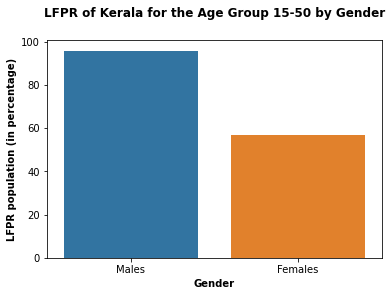

In [124]:
#lets visualise it

sns.barplot(x='Gender', y='LFPR(in Percentage',data=df_lfpr)
plt.title('LFPR of Kerala for the Age Group 15-50 by Gender',fontweight='bold',y=1.08)
plt.xlabel('Gender',fontweight='bold')
plt.ylabel('LFPR population (in percentage)',fontweight='bold')

#Distribution of occupational categories by gender

In [125]:
dfmmr_Ax=dflfpr.groupby('Age Group')
dfmmr_ATx=dfmmr_Ax.get_group('Total')

data_last=(['Main Workers',dfmmr_ATx['Main_Males'].sum(),dfmmr_ATx['Main_Females'].sum()],['Marginal Workers',dfmmr_ATx['Marg_T_Males'].sum(),dfmmr_ATx['Marg_T_Females'].sum()],['Non Workers',dfmmr_ATx['NW_T_Males'].sum(),dfmmr_ATx['NW_T_Females'].sum()])
df_last=pd.DataFrame(data=data_last,columns=['Category','Males','Females'])

df_last.head()

,Category,Males,Females
0,Main Workers,7179828.0,2149919.0
1,Marginal Workers,1271741.0,1017575.0
2,Non Workers,7575843.0,14211155.0


Text(0, 0.5, 'Worker Population(in ten millions)')

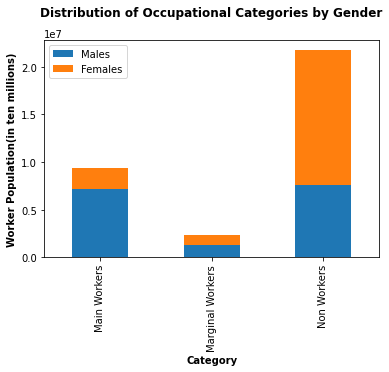

In [126]:
#lets visualise the above dataframe

df_last.plot(kind='bar',x='Category',y=['Males','Females'], stacked=True)

plt.title('Distribution of Occupational Categories by Gender',fontweight='bold',y=1.08)
plt.xlabel('Category',fontweight='bold')
plt.ylabel('Worker Population(in ten millions)',fontweight='bold')